# Guided Project: Employee Satisfaction

In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Our stakeholders want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get started analyzing the first question.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [5]:
#dete_survey exploration:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [6]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
#tafe_survey exploration:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Our dete_survey contains 822 responses, while our tafe_survey contains 702 responses. Additionally, the tafe_survey has 16 additional columns that represent questions for employees. 

Both surveys have certain columns that contain a large number of null values. Each data set should be cleaned and standardized before proceeding. The following observations stand out:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Data Cleaning

To start, we'll handle the first two issues from our list. We'll begin by reading the data into our project again, but this time treating 'Not Stated' values as NaN.

Then, we'll drop some columns from each dataframe that we wont use in our analysis to make each datafram easier to work with.

In [11]:
#Re-reading the data into our project:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [12]:
#Dropping columns from both surveys:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

We changed the NaN values to "Not Stated" because an employee not responding to a question is a choice, and non responses should not be counted as 'zeros' in our data analysis. This is mostly for ease of use.

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names.

In [13]:
#Renaming dete_survey_updated columns
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('/',' ').str.replace(' ',"_").str.lower()

In [14]:
#Renaming tafe_survey_updated columns
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [15]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
#Renaming the 'Resignation' Data to fall under the standard response
dete_survey_updated['separationtype'] = dete_survey_updated[
    'separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
dete_resignations = dete_survey_updated[
    dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[
    tafe_survey_updated['separationtype'] == 'Resignation'].copy()

We only want to look at data from employees who resigned, but our data classified them into smaller sub-categories. At the moment, we want to consolidate all resignations into one general category so that we can make larger generalizations about our data.

## Verifying Our Data

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [19]:
#Checking the unique values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [20]:
dete_resignations['cease_date'] = dete_resignations[
    'cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations[
    'cease_date'].astype(float)

#Checking the values again and look for outliers
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
#Repeating the process for dete_start_date
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

The dete_start_date column seems to already be formatted correctly, so we can proceed to the tafe_resignations dataset.

In [22]:
#Checking values in tafe_resignations:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

From the code we ran, we can verify:

- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years. Because we aren't interested in analyzing by each year, we'll leave them as is.

## Creating a New Column

In [23]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

As a valuable data point, we want to know how long people were employed before they resigned. The above code creates a new column that shows the length of their service.

## Identifying Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

 - tafe_survey_updated:
  - Contributing Factors. Dissatisfaction
  - Contributing Factors. Job Dissatisfaction
 - dafe_survey_updated:
  - job_dissatisfaction
  - dissatisfaction_with_the_department
  - physical_work_environment
  - lack_of_recognition
  - lack_of_job_security
  - work_location
  - employment_conditions
  - work_life_balance
  - workload
  
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

 - True: indicates a person resigned because they were dissatisfied in some way
 - False: indicates a person resigned because of a reason other than dissatisfaction with the job
 - NaN: indicates the value is missing

In [24]:
#Checking for Unique Values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [25]:
#Checking for Unique Values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [26]:
#Updating the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True 

tafe_resignations['dissatisfied'] = tafe_resignations[[
    'Contributing Factors. Dissatisfaction', 
    'Contributing Factors. Job Dissatisfaction']].applymap(
    update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

#Checking the unique values after the code has run:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
#Updating the values in the contributing factors columns to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[[
    'job_dissatisfaction','dissatisfaction_with_the_department',
    'physical_work_environment','lack_of_recognition',
    'lack_of_job_security','work_location','employment_conditions',
    'work_life_balance','workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

#Checking the unique values after the code has run:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

We cleaned out data so we can make a more concrete conclusion about when employees were dissatisfied. If they mentioned dissatisfaction as part of their resignation in the exit survey, we assigned boolean value of true or false to their data. This makes it easier to index all employees who mentioned dissatisfaction, and allows us to objectively evaluate dissatisfied as a seperate group.

## Combining Our Dataframes

So far, we've performed the following tasks:

 - Renamed our columns
 - Dropped any data not needed for our analysis
 - Verified the quality of our data
 - Created a new institute_service column
 - Cleaned the Contributing Factors columns
 - Created a new column indicating if an employee resigned because they were dissatisfied in some way
 
Now, we're finally ready to combine our datasets.

In [28]:
#First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [44]:
#Now, let's combine our dataframes:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],
                    ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

We still have some columns left in the dataframe that we dont need to complete our analysis. We'll drop any columns with less than 500 null values.

In [30]:
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

Dropping unnecessary data makes our dataset easier to work with, and consolidating both datasets into a singular, standardized, table will allow us to visualize data when necessary.

## More Cleaning 

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms.

To analyze the data, we'll convert the values in `institute_service` into categories based off of each employee's experience level:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [31]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [32]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

combined_updated['institute_service'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [33]:
#Converting # of years of service to a category
def career_stage(x):
    if x >= 11:
        return 'Veteran'
    elif x>=7:
        return 'Established'
    elif x>=3:
        return 'Experienced'
    elif pd.isnull(x):
        return np.nan
    else:
        return 'New'
    
#Applying the formula:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

By grouping these numerical data into seperate categories, we can clearly make analysis about different types of employees. If new employees are more likely to be dissatisfied than veteran employees, for example, that would be a valuable piece of data to observe. With this, we're finally ready to perform some analysis on our data.

## Analysis - Conclusion

We've now created a service_cat column that categorizes employees according to the amount of years spent in their workplace:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

The `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a `True` value is considered to be 1 and a `False` value is considered to be 0. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

In [34]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
#Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



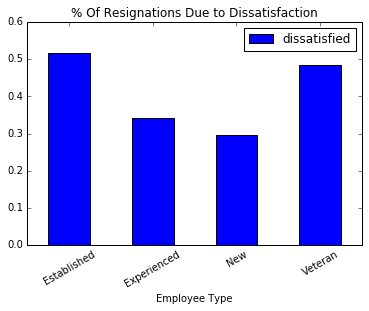

In [43]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)
plt.xlabel('Employee Type')
plt.title('% Of Resignations Due to Dissatisfaction')

We can see pretty clearly from the table above that the more experience an employee has, the more likely that dissatisfaction will play a role in their resigning at our company. This is a good stopping point for initial analysis. More could be done, but analysis past this point might vary depending on specific conditions at a real company.